In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
import random
from numpy.random import seed
random.seed(36)
seed(36)
tf.random.set_seed(36)
np.random.seed(36)
import os
os.environ['PYTHONHASHSEED'] = '0'
tf.keras.utils.set_random_seed(36)
tf.config.experimental.enable_op_determinism()

In [4]:
# Read the data
df = pd.read_csv('./Invistico_Airline.csv')
df.head(3)

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  

[3 rows x 23 columns]

### Data Preprocessing

In [5]:
df.shape

(129880, 23)

In [6]:
df.describe()

Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight wifi service  Inflight entertainment  Online support  \
count          129880.000000           129880.000000   129880.000000   
mean                3.249130                3.383477        3.519703   
std                 1.318818                1.346059        1.306511   
min                 0.000000                0.000000        0.000000   
25%                 2.000000                2.000000        3.000000   
50%                 3.000000                4.000000        4.000000   
75%                 4.000000                4.000000        5.000000   
max                 5.000000                5.000000        5.000000   

       Ease of Online booking  On-board service  Leg room service  \
count           129880.000000     129880.000000     129880.000000   
mean                 3.472105          3.465075          3.485902   
std                  1.305560          1.270836          1.292226   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          3.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          4.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service    Cleanliness  Online boarding  \
count     129880.000000    129880.000000  129880.000000    129880.000000   
mean           3.695673         3.340807       3.705759         3.352587   
std            1.156483         1.260582       1.151774         1.298715   
min            1.000000         0.000000       0.000000         0.000000   
25%            3.000000         3.000000       3.000000         2.000000   
50%            4.000000         3.000000       4.000000         4.000000   
75%            5.000000         4.000000       5.000000         4.000000   
max            5.000000         5.000000       5.000000         5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               129880.000000             129487.000000  
mean                    14.713713                 15.091129  
std                     38.071126                 38.465650  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [8]:
print(df.isnull().sum())
print('percentage of NaN value: '+ str(round(df['Arrival Delay in Minutes'].isnull().sum()/len(df)*100, 4)) +'%')

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
percentage of NaN value: 0.3026%


In [9]:
df.dropna(inplace=True)

In [10]:
df['satisfaction'].value_counts()

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

In [11]:
# find columns for categorical data
df_obj = df.select_dtypes(include=["object"])
cat_column = df_obj.columns

# find columns for float data
df_float = df.select_dtypes(include=["float"])
num_column1 = df_float.columns

# find columns for integer data
data_int = df.select_dtypes(include=["int"])
num_column2 = data_int.columns

In [12]:
num_column = num_column1.append(num_column2)
cat_column = cat_column.drop('satisfaction')

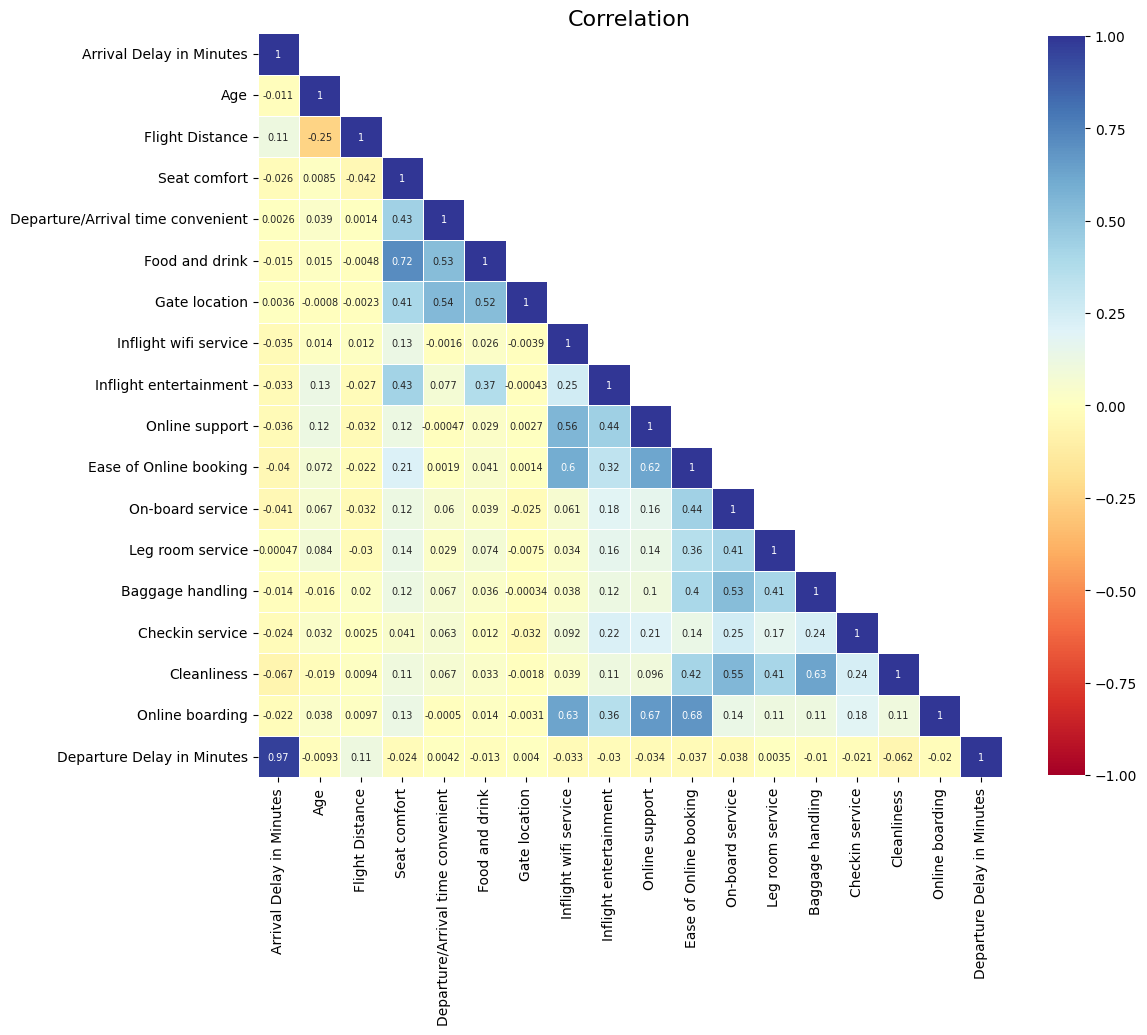

In [13]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df[num_column].corr()), k=1)
sns.heatmap(df[num_column].corr(), annot=True, cmap='RdYlBu', mask=mask, linewidths=0.5,
            vmin = -1.0, vmax=1.0, square=True, linecolor='white', annot_kws={'size':7},
            cbar_kws={'shrink':0.8})
plt.title('Correlation', fontsize=16)
plt.show()

In [14]:
categorical_encoder = OneHotEncoder(handle_unknown="ignore")
cat = categorical_encoder.fit_transform(df[cat_column]).toarray()

numerical_encoder = StandardScaler()
num = numerical_encoder.fit_transform(df[num_column])

In [15]:
# satisfied = 1, dissatisfied = 0
lable_encoder = LabelEncoder()
df['satisfaction'] = lable_encoder.fit_transform(df['satisfaction'])
df['satisfaction'].value_counts()


1    70882
0    58605
Name: satisfaction, dtype: int64

In [16]:
X = np.hstack([cat, num])
y = df['satisfaction'].to_numpy()
X.shape, y.shape

((129487, 27), (129487,))

In [17]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36, stratify=y)
X_train_s.shape, X_test_s.shape, y_train.shape, y_test.shape

((90640, 27), (38847, 27), (90640,), (38847,))

### Decision Tree

In [18]:
clf = DecisionTreeClassifier(criterion='gini', random_state=36)
clf.fit(X_train_s, y_train)
y_pred = clf.predict(X_test_s)
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9381


In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[16442  1140]
 [ 1263 20002]]


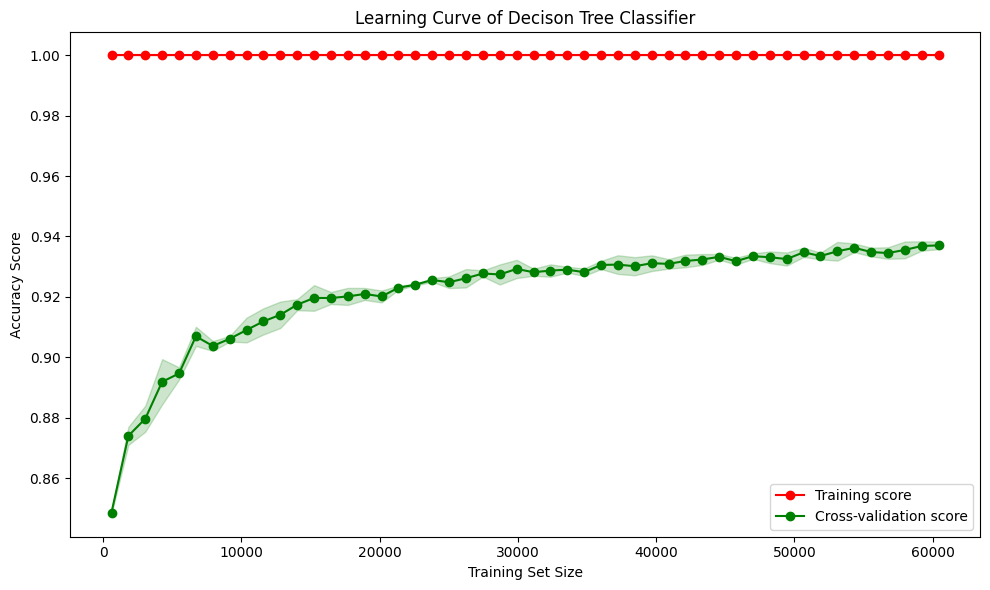

In [20]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of Decison Tree Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [21]:
# GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
                'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20],
                'max_features': ['sqrt','log2'],
                'criterion': ['gini','entropy'],
                'splitter': ['best','random']}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [22]:
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=36), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                       25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                              14, 16, 18, 20],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 24, 28, 32, 36, 40],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 24,
 'splitter': 'best'}

In [24]:
clf_best = grid_search.best_estimator_

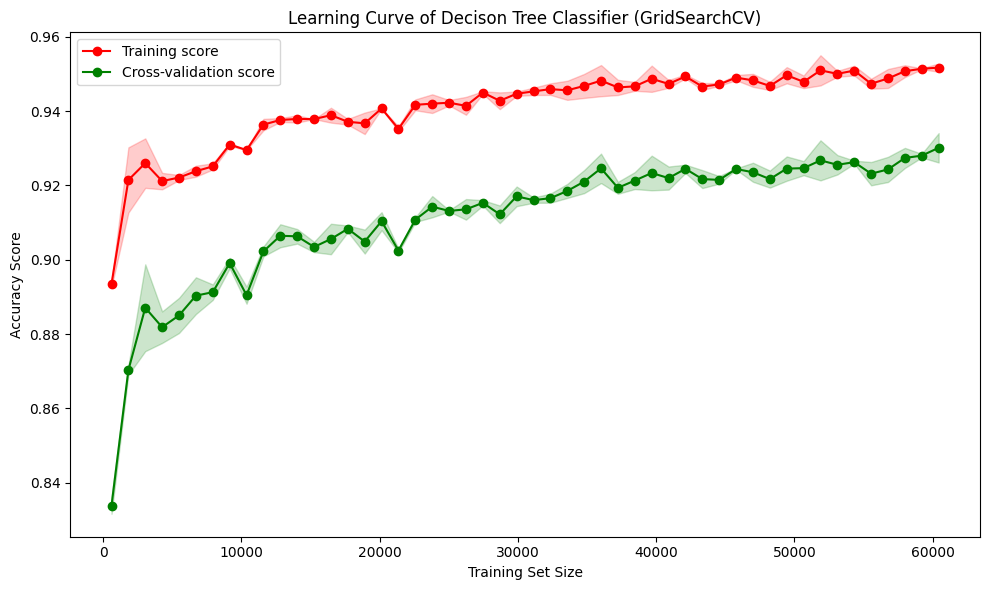

In [25]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf_best, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of Decison Tree Classifier (GridSearchCV)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [26]:
clf_best.fit(X_train_s, y_train)
y_pred = clf_best.predict(X_test_s)
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.9289
Confusion Matrix:
[[16478  1104]
 [ 1657 19608]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     17582
           1       0.95      0.92      0.93     21265

    accuracy                           0.93     38847
   macro avg       0.93      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



In [27]:
# Plot the validation curve for max_depth
train_scores, valid_scores = validation_curve(clf_best, X_test_s, y_test, param_name="max_depth", param_range=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25], cv=3)

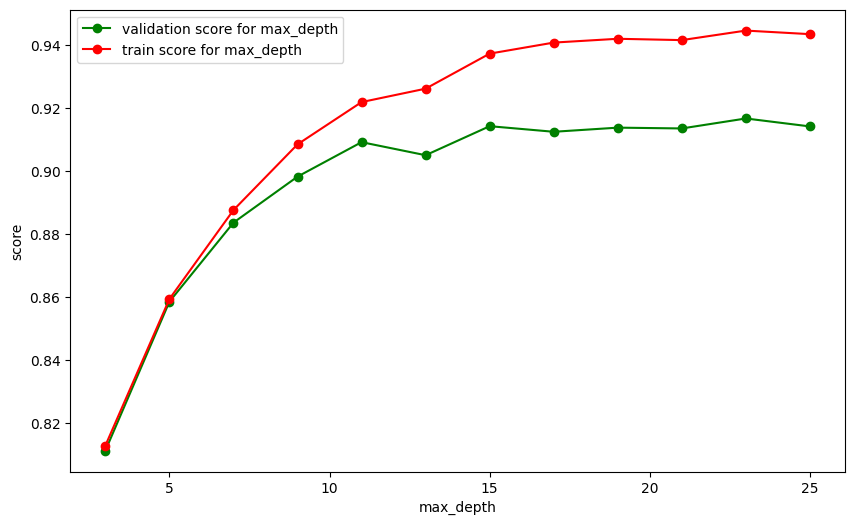

In [28]:
plt.figure(figsize=(10,6))
plt.plot([3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for max_depth')
plt.plot([3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for max_depth')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()


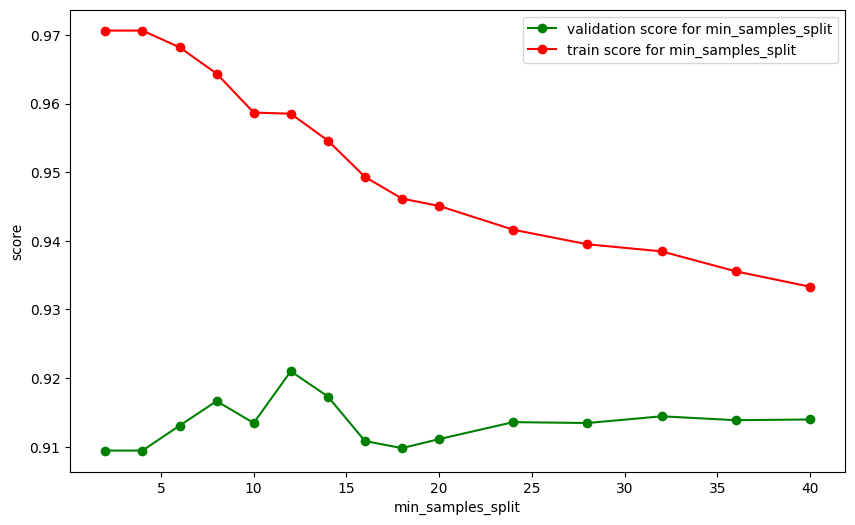

In [29]:
# Plot the validation curve for min_samples_split
train_scores, valid_scores = validation_curve(clf_best, X_test_s, y_test, param_name="min_samples_split", param_range=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40], cv=3)

plt.figure(figsize=(10,6))
plt.plot([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for min_samples_split')
plt.plot([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for min_samples_split')
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()

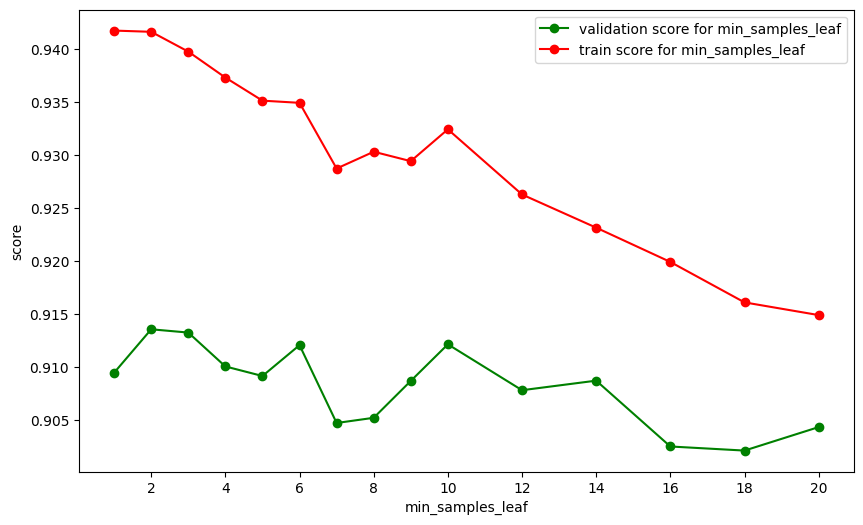

In [30]:
# Plot the validation curve for min_samples_leaf
train_scores, valid_scores = validation_curve(clf_best, X_test_s, y_test, param_name="min_samples_leaf", param_range=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], cv=3)

plt.figure(figsize=(10,6))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for min_samples_leaf')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for min_samples_leaf')
plt.legend()
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.show()


In [31]:
import time
def Time(classifier, X, Y):
    start = time.time()
    classifier.fit(X, Y)
    end = time.time()
    return end-start

print('Run Time for Training:', Time(clf_best, X_train_s, y_train))
print('Run Time for Testing:', Time(clf_best, X_test_s, y_test)) 

Run Time for Training: 0.0749666690826416
Run Time for Testing: 0.02950596809387207


### Neural Network

In [32]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.optimizer.lr = 0.01

In [33]:
model.fit(x=X_train_s, y=y_train, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
1417/1417 - 1s - loss: 0.2246 - accuracy: 0.9075 - 1s/epoch - 828us/step
Epoch 2/50
1417/1417 - 1s - loss: 0.1694 - accuracy: 0.9282 - 857ms/epoch - 605us/step
Epoch 3/50
1417/1417 - 1s - loss: 0.1549 - accuracy: 0.9341 - 827ms/epoch - 584us/step
Epoch 4/50
1417/1417 - 1s - loss: 0.1480 - accuracy: 0.9375 - 835ms/epoch - 590us/step
Epoch 5/50
1417/1417 - 1s - loss: 0.1418 - accuracy: 0.9391 - 836ms/epoch - 590us/step
Epoch 6/50
1417/1417 - 1s - loss: 0.1393 - accuracy: 0.9413 - 842ms/epoch - 594us/step
Epoch 7/50
1417/1417 - 1s - loss: 0.1357 - accuracy: 0.9423 - 846ms/epoch - 597us/step
Epoch 8/50
1417/1417 - 1s - loss: 0.1335 - accuracy: 0.9430 - 848ms/epoch - 598us/step
Epoch 9/50
1417/1417 - 1s - loss: 0.1346 - accuracy: 0.9427 - 847ms/epoch - 597us/step
Epoch 10/50
1417/1417 - 1s - loss: 0.1308 - accuracy: 0.9443 - 849ms/epoch - 599us/step
Epoch 11/50
1417/1417 - 1s - loss: 0.1289 - accuracy: 0.9448 - 842ms/epoch - 594us/step
Epoch 12/50
1417/1417 - 1s - loss: 0.1305 - 

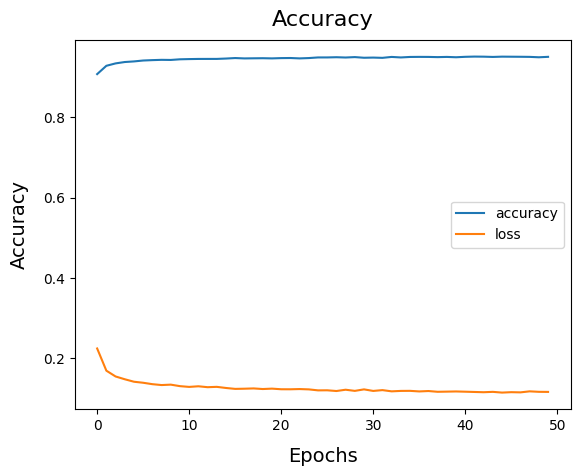

In [34]:
losses = pd.DataFrame(model.history.history)

plt.plot(losses['accuracy'], label='accuracy')
plt.plot(losses['loss'], label='loss')
plt.xlabel('Epochs', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)
plt.title('Accuracy', fontsize=16, pad=10)
plt.legend()
plt.show()

In [35]:
y_pred = model.predict(X_test_s)
prediction  = [1 if y>=0.5 else 0 for y in y_pred]
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, prediction))) 

1214/1214 [==============================] - 0s 315us/step
Accuracy score: 0.9533


In [36]:
model.evaluate(X_test_s, y_test)

1214/1214 [==============================] - 1s 361us/step - loss: 0.1055 - accuracy: 0.9533


[0.10554130375385284, 0.9533039927482605]

In [37]:
from keras.wrappers.scikit_learn import KerasClassifier

In [38]:
def ann_model(layers, dropout_rate, neurons, learning_rate, activation, optimizer):
    model = Sequential()
    for i in range(layers):
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [39]:
model = KerasClassifier(build_fn=ann_model, verbose=1)

C:\Users\VL_001\AppData\Local\Temp\ipykernel_5504\1837252769.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=ann_model, verbose=1)


In [40]:
layers = [1, 2, 3, 4]
dropout_rates = [0.0, 0.1, 0.2, 0.3]
neurons = [8, 16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
activations = ['gelu', 'relu', 'sigmoid']
optimizers = ['SGD', 'RMSprop', 'Adam']
batch_sizes = [32, 64, 128, 256]
epochs = [20, 30, 40, 50, 100, 150, 200]

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
param_grid = dict(layers=layers, dropout_rate=dropout_rates, 
                  neurons=neurons, batch_size=batch_sizes, 
                  epochs=epochs, learning_rate=learning_rates,
                  activation=activations, optimizer=optimizers)

In [43]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, random_state=36, n_iter=100, n_jobs=12)

In [44]:
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=9, cv=3)

In [45]:
grid_result = grid.fit(X_train_s, y_train)

c:\Users\VL_001\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.3929 - accuracy: 0.8249
Epoch 2/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.2924 - accuracy: 0.8739
Epoch 3/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.2307 - accuracy: 0.9012
Epoch 4/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.2094 - accuracy: 0.9090
Epoch 5/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1942 - accuracy: 0.9146
Epoch 6/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1825 - accuracy: 0.9202
Epoch 7/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1729 - accuracy: 0.9247
Epoch 8/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1666 - accuracy: 0.9271
Epoch 9/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1591 - accuracy: 0.9306
Epoch 10/200
2833/2833 [==============================] - 3s 1ms/step - l

In [46]:
grid_result.best_params_

{'optimizer': 'RMSprop',
 'neurons': 128,
 'learning_rate': 0.001,
 'layers': 4,
 'epochs': 200,
 'dropout_rate': 0.2,
 'batch_size': 32,
 'activation': 'sigmoid'}

In [47]:
ann_best = grid_result.best_estimator_
ann_best

In [48]:
y_pred = ann_best.predict(X_test_s)
prediction  = [1 if y>=0.5 else 0 for y in y_pred]
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, prediction)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

1214/1214 [==============================] - 0s 375us/step
Accuracy score: 0.9596
Confusion Matrix:
[[17090   492]
 [ 1079 20186]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     17582
           1       0.98      0.95      0.96     21265

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



c:\Users\VL_001\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


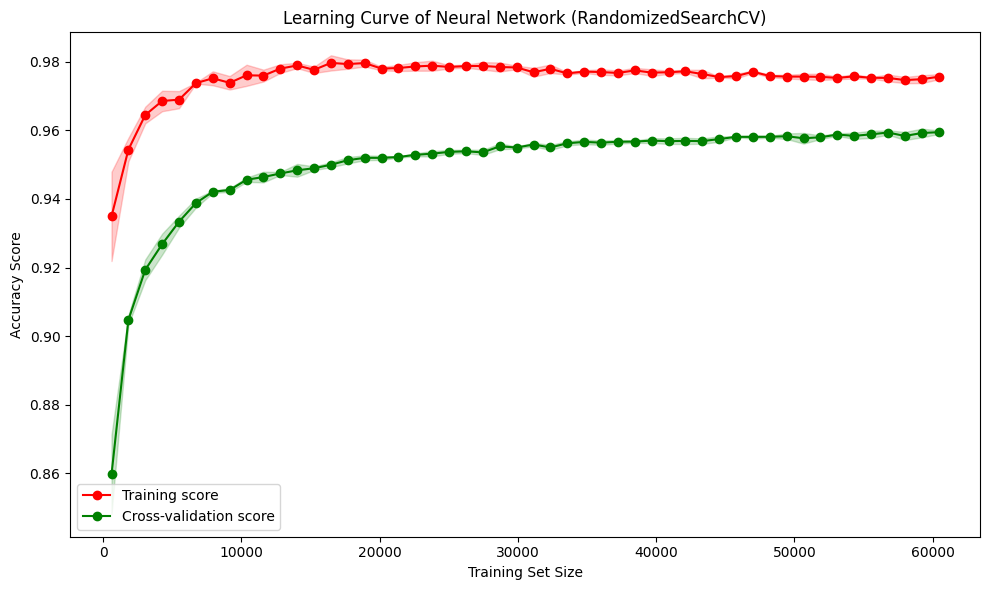

In [49]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(ann_best, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of Neural Network (RandomizedSearchCV)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Epoch 1/200
810/810 [==============================] - 1s 547us/step - loss: 0.4212 - accuracy: 0.8130
Epoch 2/200
810/810 [==============================] - 0s 535us/step - loss: 0.3808 - accuracy: 0.8363
Epoch 3/200
810/810 [==============================] - 0s 529us/step - loss: 0.3564 - accuracy: 0.8454
Epoch 4/200
810/810 [==============================] - 0s 532us/step - loss: 0.3233 - accuracy: 0.8623
Epoch 5/200
810/810 [==============================] - 0s 531us/step - loss: 0.2908 - accuracy: 0.8783
Epoch 6/200
810/810 [==============================] - 0s 542us/step - loss: 0.2711 - accuracy: 0.8866
Epoch 7/200
810/810 [==============================] - 0s 540us/step - loss: 0.2547 - accuracy: 0.8910
Epoch 8/200
810/810 [==============================] - 0s 538us/step - loss: 0.2440 - accuracy: 0.8972
Epoch 9/200
810/810 [==============================] - 0s 537us/step - loss: 0.2351 - accuracy: 0.9001
Epoch 10/200
810/810 [==============================] - 0s 535us/step - l

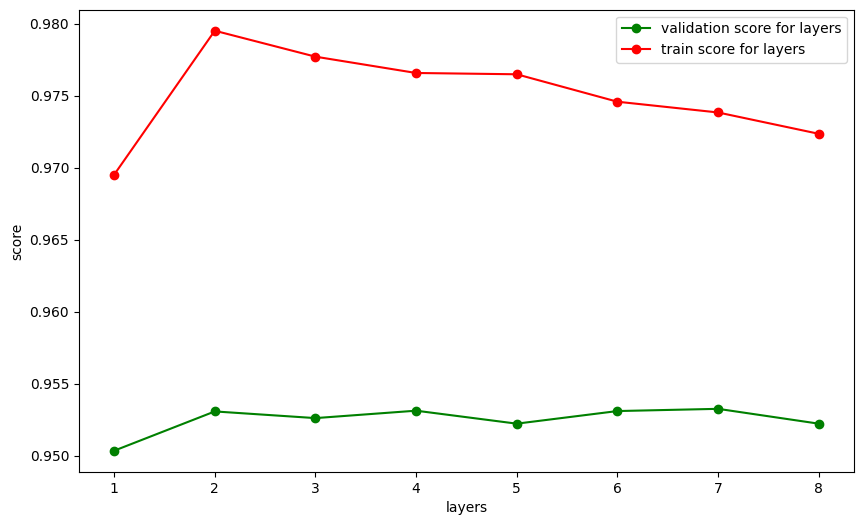

In [50]:
# Plot the validation curve for number of layers
train_scores, valid_scores = validation_curve(ann_best, X_test_s, y_test, param_name="layers", param_range = [1, 2, 3, 4, 5, 6, 7, 8], cv=3)

plt.figure(figsize=(10,6))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for layers')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for layers')
plt.legend()
plt.xlabel('layers')
plt.ylabel('score')
plt.show()

Epoch 1/200
810/810 [==============================] - 1s 692us/step - loss: 0.4094 - accuracy: 0.8113
Epoch 2/200
810/810 [==============================] - 1s 685us/step - loss: 0.3704 - accuracy: 0.8392
Epoch 3/200
810/810 [==============================] - 1s 681us/step - loss: 0.3614 - accuracy: 0.8440
Epoch 4/200
810/810 [==============================] - 1s 688us/step - loss: 0.3067 - accuracy: 0.8697
Epoch 5/200
810/810 [==============================] - 1s 685us/step - loss: 0.2379 - accuracy: 0.8984
Epoch 6/200
810/810 [==============================] - 1s 684us/step - loss: 0.2167 - accuracy: 0.9077
Epoch 7/200
810/810 [==============================] - 1s 695us/step - loss: 0.2041 - accuracy: 0.9124
Epoch 8/200
810/810 [==============================] - 1s 680us/step - loss: 0.1975 - accuracy: 0.9158
Epoch 9/200
810/810 [==============================] - 1s 685us/step - loss: 0.1910 - accuracy: 0.9205
Epoch 10/200
810/810 [==============================] - 1s 677us/step - l

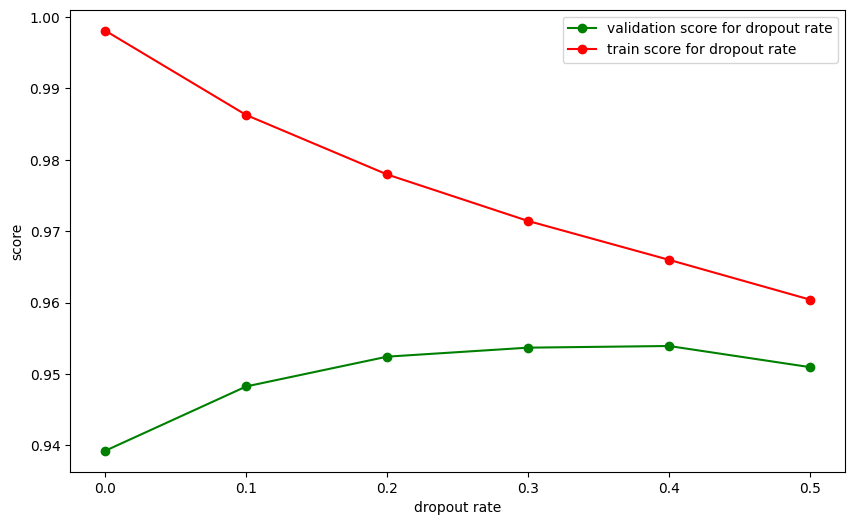

In [51]:
# Plot the validation curve for dropout rate
train_scores, valid_scores = validation_curve(ann_best, X_test_s, y_test, param_name="dropout_rate", param_range=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], cv=3)

plt.figure(figsize=(10,6))
plt.plot([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for dropout rate')
plt.plot([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for dropout rate')
plt.legend()
plt.xlabel('dropout rate')
plt.ylabel('score')
plt.show()

Epoch 1/200
810/810 [==============================] - 1s 486us/step - loss: 0.7167 - accuracy: 0.5053
Epoch 2/200
810/810 [==============================] - 0s 480us/step - loss: 0.6574 - accuracy: 0.6221
Epoch 3/200
810/810 [==============================] - 0s 486us/step - loss: 0.5481 - accuracy: 0.7569
Epoch 4/200
810/810 [==============================] - 0s 485us/step - loss: 0.5003 - accuracy: 0.7858
Epoch 5/200
810/810 [==============================] - 0s 486us/step - loss: 0.4813 - accuracy: 0.8013
Epoch 6/200
810/810 [==============================] - 0s 504us/step - loss: 0.4725 - accuracy: 0.8073
Epoch 7/200
810/810 [==============================] - 0s 478us/step - loss: 0.4614 - accuracy: 0.8129
Epoch 8/200
810/810 [==============================] - 0s 483us/step - loss: 0.4591 - accuracy: 0.8132
Epoch 9/200
810/810 [==============================] - 0s 485us/step - loss: 0.4519 - accuracy: 0.8198
Epoch 10/200
810/810 [==============================] - 0s 486us/step - l

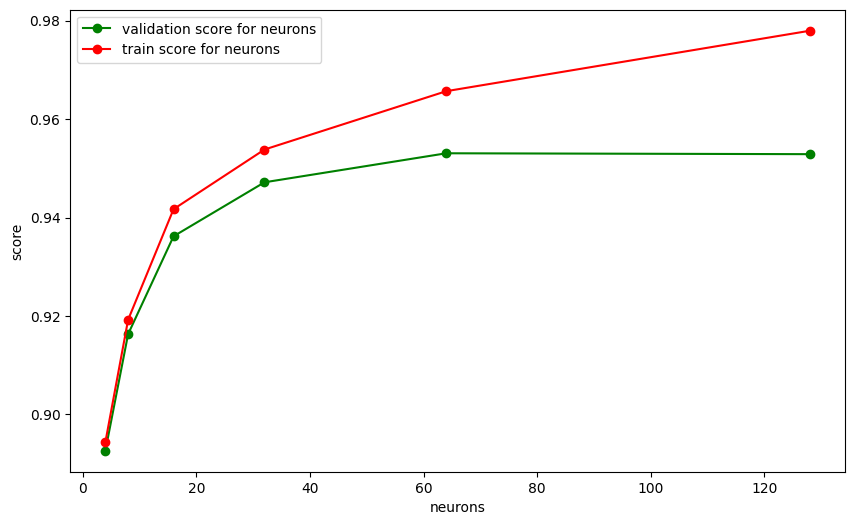

In [52]:
# Plot the validation curve for neurons
train_scores, valid_scores = validation_curve(ann_best, X_test_s, y_test, param_name="neurons", param_range=[4, 8, 16, 32, 64, 128], cv=3)

plt.figure(figsize=(10,6))
plt.plot([4, 8, 16, 32, 64, 128], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for neurons')
plt.plot([4, 8, 16, 32, 64, 128], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for neurons')
plt.legend()
plt.xlabel('neurons')
plt.ylabel('score')
plt.show()

Epoch 1/200
810/810 [==============================] - 1s 442us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 2/200
810/810 [==============================] - 0s 438us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 3/200
810/810 [==============================] - 0s 441us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 4/200
810/810 [==============================] - 0s 436us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 5/200
810/810 [==============================] - 0s 439us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 6/200
810/810 [==============================] - 0s 439us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 7/200
810/810 [==============================] - 0s 436us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 8/200
810/810 [==============================] - 0s 449us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 9/200
810/810 [==============================] - 0s 439us/step - loss: 0.6931 - accuracy: 0.4519
Epoch 10/200
810/810 [==============================] - 0s 430us/step - l

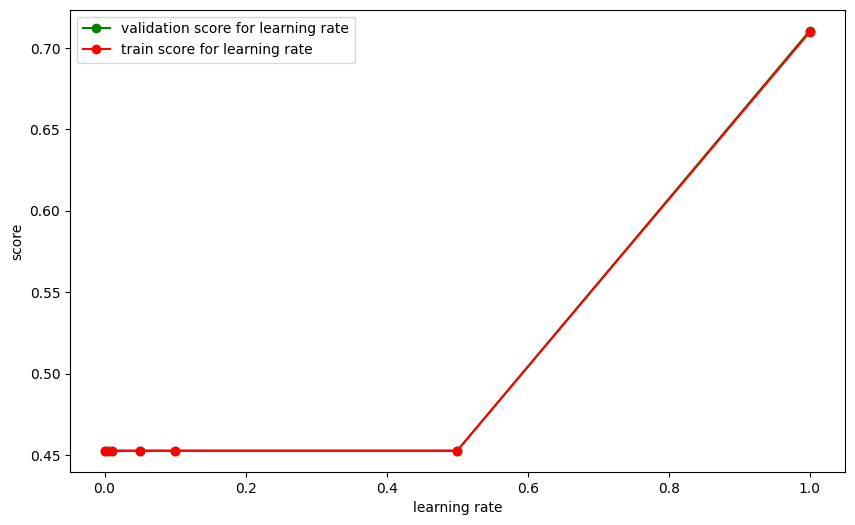

In [53]:
# Plot the validation curve for learning_rates
train_scores, valid_scores = validation_curve(ann_best, X_test_s, y_test, param_name="learning_rate", param_range=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], cv=3)

plt.figure(figsize=(10,6))
plt.plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for learning rate')
plt.plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for learning rate')
plt.legend()
plt.xlabel('learning rate')
plt.ylabel('score')
plt.show()

Epoch 1/200
1619/1619 [==============================] - 2s 803us/step - loss: 0.4174 - accuracy: 0.8101
Epoch 2/200
1619/1619 [==============================] - 1s 808us/step - loss: 0.3745 - accuracy: 0.8380
Epoch 3/200
1619/1619 [==============================] - 1s 808us/step - loss: 0.3450 - accuracy: 0.8491
Epoch 4/200
1619/1619 [==============================] - 1s 811us/step - loss: 0.2796 - accuracy: 0.8808
Epoch 5/200
1619/1619 [==============================] - 1s 812us/step - loss: 0.2525 - accuracy: 0.8925
Epoch 6/200
1619/1619 [==============================] - 1s 804us/step - loss: 0.2344 - accuracy: 0.9015
Epoch 7/200
1619/1619 [==============================] - 1s 802us/step - loss: 0.2252 - accuracy: 0.9044
Epoch 8/200
1619/1619 [==============================] - 1s 810us/step - loss: 0.2154 - accuracy: 0.9091
Epoch 9/200
1619/1619 [==============================] - 1s 807us/step - loss: 0.2065 - accuracy: 0.9113
Epoch 10/200
1619/1619 [==============================]

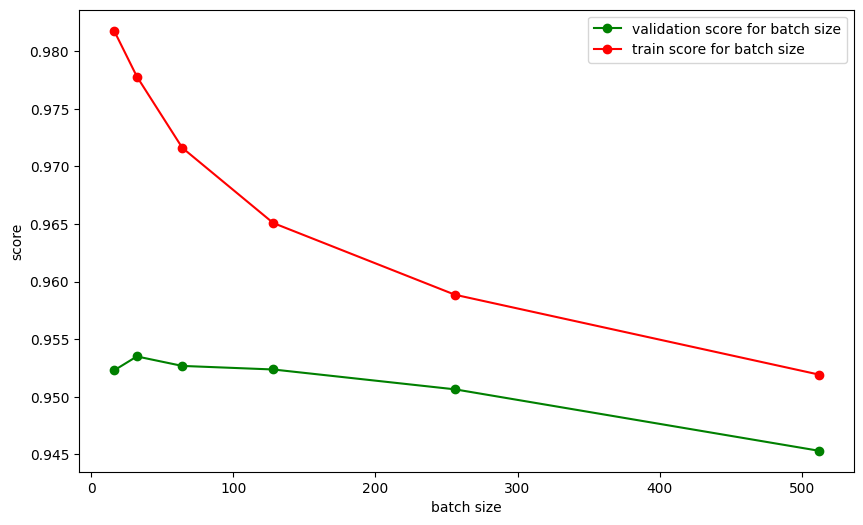

In [54]:
# Plot the validation curve for batch_size
train_scores, valid_scores = validation_curve(ann_best, X_test_s, y_test, param_name="batch_size", param_range=[16, 32, 64, 128, 256, 512], cv=3)

plt.figure(figsize=(10,6))
plt.plot([16, 32, 64, 128, 256, 512], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for batch size')
plt.plot([16, 32, 64, 128, 256, 512], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for batch size')
plt.legend()
plt.xlabel('batch size')
plt.ylabel('score')
plt.show()

Epoch 1/10
810/810 [==============================] - 1s 1ms/step - loss: 0.4325 - accuracy: 0.7964
Epoch 2/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3799 - accuracy: 0.8380
Epoch 3/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3695 - accuracy: 0.8411
Epoch 4/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3519 - accuracy: 0.8465
Epoch 5/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3008 - accuracy: 0.8694
Epoch 6/10
810/810 [==============================] - 1s 1ms/step - loss: 0.2625 - accuracy: 0.8866
Epoch 7/10
810/810 [==============================] - 1s 1ms/step - loss: 0.2458 - accuracy: 0.8961
Epoch 8/10
810/810 [==============================] - 1s 1ms/step - loss: 0.2326 - accuracy: 0.9023
Epoch 9/10
810/810 [==============================] - 1s 1ms/step - loss: 0.2260 - accuracy: 0.9046
Epoch 10/10
810/810 [==============================] - 0s 454us/step - loss: 0.1967 - accuracy: 0.91

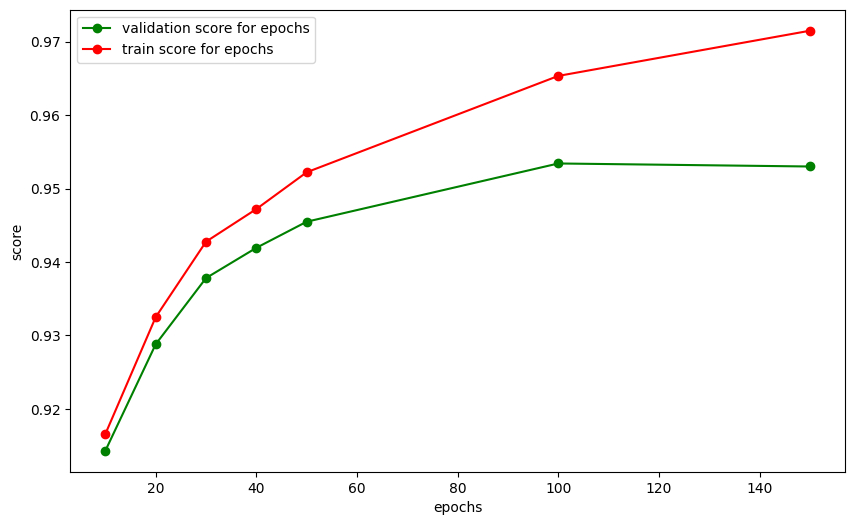

In [55]:
# Plot the validation curve for epochs
train_scores, valid_scores = validation_curve(ann_best, X_test_s, y_test, param_name="epochs", param_range=[10, 20, 30, 40, 50, 100, 150], cv=3)

plt.figure(figsize=(10,6))
plt.plot([10, 20, 30, 40, 50, 100, 150], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for epochs')
plt.plot([10, 20, 30, 40, 50, 100, 150], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for epochs')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('score')
plt.show()

In [56]:
print('Run Time for Training:', Time(ann_best, X_train_s, y_train))

Epoch 1/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.3941 - accuracy: 0.8231
Epoch 2/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.2711 - accuracy: 0.8839
Epoch 3/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.2247 - accuracy: 0.9038
Epoch 4/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.2039 - accuracy: 0.9108
Epoch 5/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1884 - accuracy: 0.9183
Epoch 6/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1784 - accuracy: 0.9223
Epoch 7/200
2833/2833 [==============================] - 3s 1ms/step - loss: 0.1697 - accuracy: 0.9258
Epoch 8/200
2833/2833 [==============================] - 3s 995us/step - loss: 0.1630 - accuracy: 0.9282
Epoch 9/200
2833/2833 [==============================] - 3s 1000us/step - loss: 0.1563 - accuracy: 0.9316
Epoch 10/200
2833/2833 [==============================] - 3s 1ms/ste

In [57]:
print('Run Time for Testing:', Time(ann_best, X_test_s, y_test)) 

Epoch 1/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.4203 - accuracy: 0.8066
Epoch 2/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.3733 - accuracy: 0.8393
Epoch 3/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8505
Epoch 4/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.2715 - accuracy: 0.8840
Epoch 5/200
1214/1214 [==============================] - 1s 999us/step - loss: 0.2464 - accuracy: 0.8952
Epoch 6/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.2308 - accuracy: 0.9026
Epoch 7/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.2202 - accuracy: 0.9071
Epoch 8/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.2125 - accuracy: 0.9089
Epoch 9/200
1214/1214 [==============================] - 1s 1ms/step - loss: 0.2038 - accuracy: 0.9129
Epoch 10/200
1214/1214 [==============================] - 1s 1ms/step -

### Boosting

In [58]:
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, 
                            algorithm='SAMME.R', learning_rate=1, random_state=36)
clf_ada.fit(X_train_s, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, random_state=36)

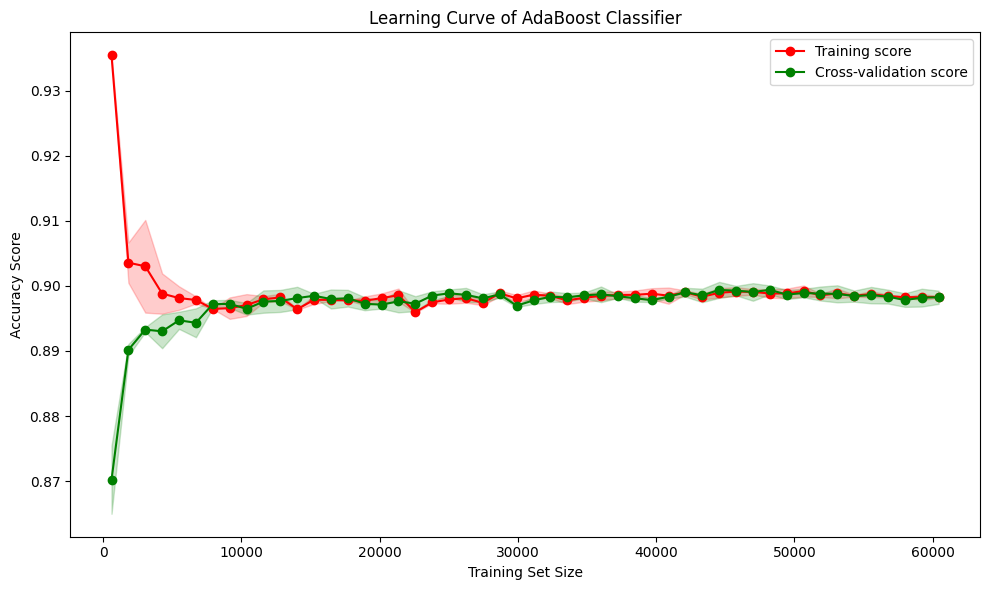

In [59]:
train_sizes, train_scores, test_scores = learning_curve(clf_ada, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of AdaBoost Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
param_grid = {'n_estimators': [50, 100, 150, 200, 300, 400],
               'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
               'algorithm': ['SAMME', 'SAMME.R'],
             }

grid_search = GridSearchCV(clf_ada, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [61]:
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          learning_rate=1, random_state=36),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150, 200, 300, 400]},
             scoring='accuracy')

In [62]:
print(grid_search.best_params_)
clf_ada_best = grid_search.best_estimator_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}


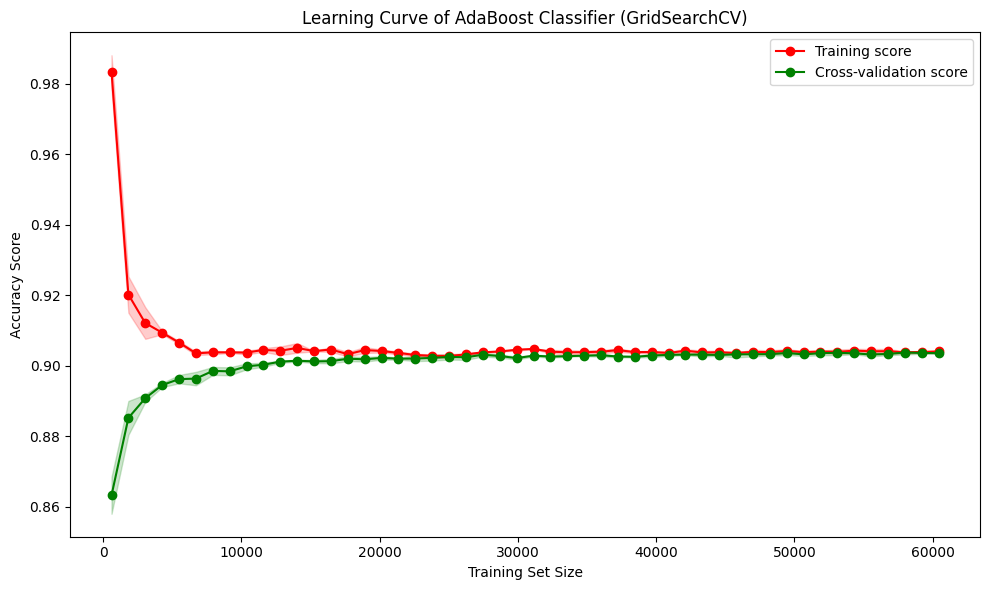

In [63]:
train_sizes, train_scores, test_scores = learning_curve(clf_ada_best, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of AdaBoost Classifier (GridSearchCV)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
y_pred = clf_ada_best.predict(X_test_s)
prediction  = [1 if y>=0.5 else 0 for y in y_pred]
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, prediction)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Accuracy score: 0.9040
Confusion Matrix:
[[15842  1740]
 [ 1988 19277]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     17582
           1       0.92      0.91      0.91     21265

    accuracy                           0.90     38847
   macro avg       0.90      0.90      0.90     38847
weighted avg       0.90      0.90      0.90     38847



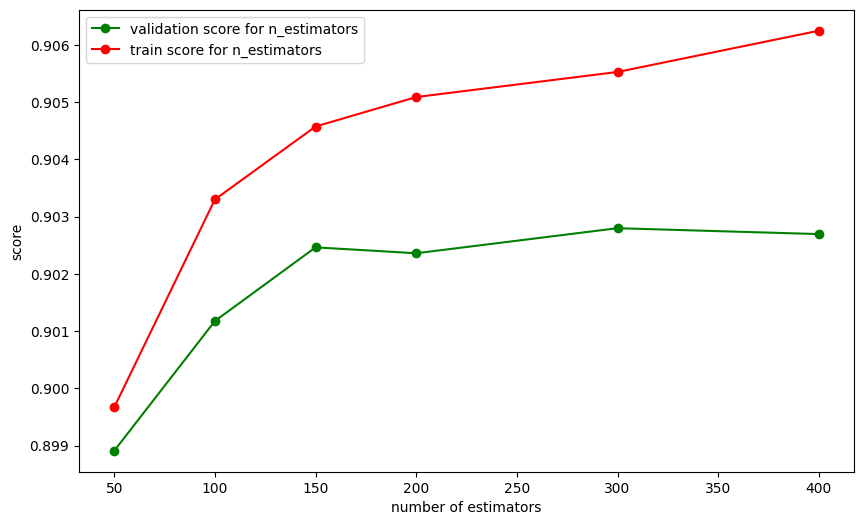

In [65]:
train_scores, valid_scores = validation_curve(clf_ada_best, X_test_s, y_test, param_name="n_estimators", param_range=[50, 100, 150, 200, 300, 400], cv=3)
plt.figure(figsize=(10,6))
plt.plot([50, 100, 150, 200, 300, 400], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for n_estimators')
plt.plot([50, 100, 150, 200, 300, 400], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for n_estimators')
plt.legend()
plt.xlabel('number of estimators')
plt.ylabel('score')
plt.show()

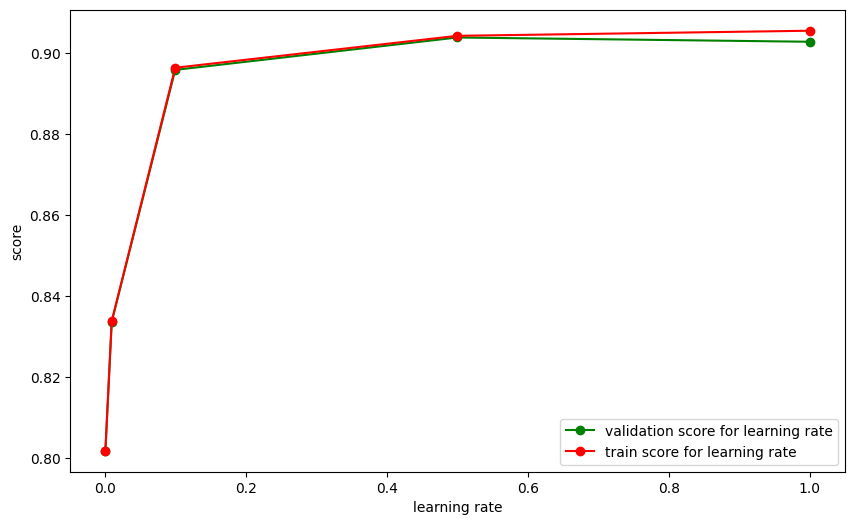

In [66]:
train_scores, valid_scores = validation_curve(clf_ada_best, X_test_s, y_test, param_name="learning_rate", param_range=[0.001, 0.01, 0.1, 0.5, 1], cv=3)
plt.figure(figsize=(10,6))
plt.plot([0.001, 0.01, 0.1, 0.5, 1], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for learning rate')
plt.plot([0.001, 0.01, 0.1, 0.5, 1], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for learning rate')
plt.legend()
plt.xlabel('learning rate')
plt.ylabel('score')
plt.show()

In [67]:
print('Run Time for Training:', Time(clf_ada_best, X_train_s, y_train))
print('Run Time for Testing:', Time(clf_ada_best, X_test_s, y_test)) 

Run Time for Training: 14.05881381034851
Run Time for Testing: 5.8383214473724365


### SVM

In [68]:
clf_svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=36)
clf_svm.fit(X_train_s, y_train)

SVC(C=1, random_state=36)

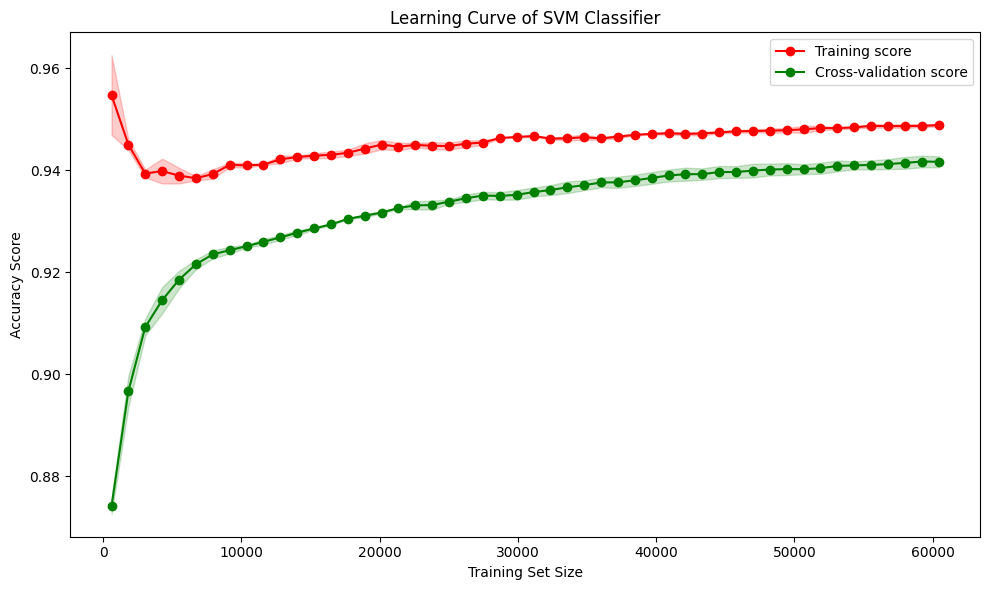

In [69]:
train_sizes, train_scores, test_scores = learning_curve(clf_svm, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of SVM Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
             }

# grid_search = GridSearchCV(clf_svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [71]:
grid_search = RandomizedSearchCV(estimator=clf_svm, param_distributions=param_grid, cv=3, random_state=36, n_iter=20, n_jobs=12)

In [72]:
grid_search.fit(X_train_s, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(C=1, random_state=36), n_iter=20,
                   n_jobs=12,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   random_state=36)

In [73]:
print(grid_search.best_params_)
clf_svm_best = grid_search.best_estimator_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


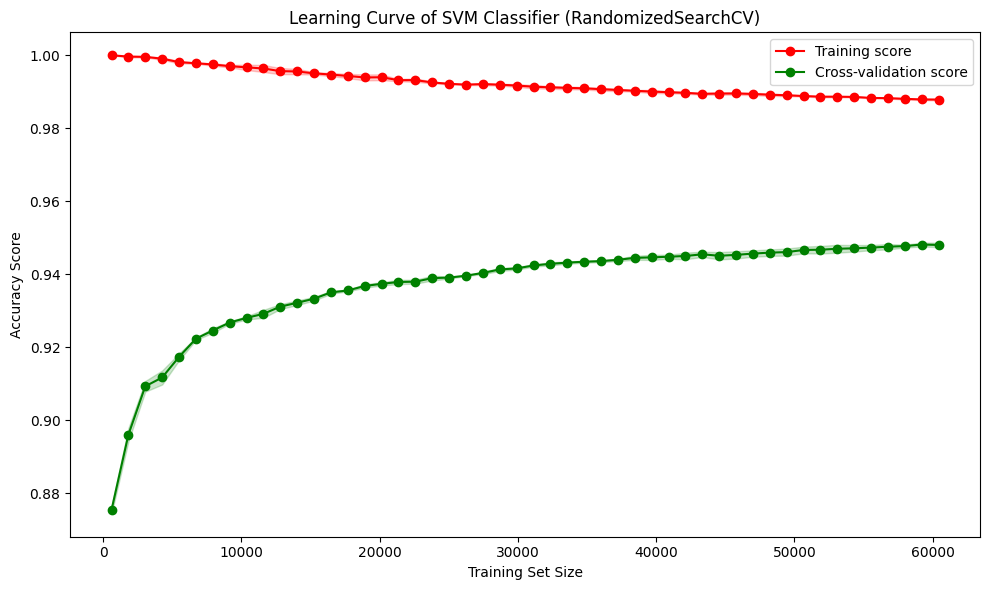

In [74]:
train_sizes, train_scores, test_scores = learning_curve(clf_svm_best, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of SVM Classifier (RandomizedSearchCV)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
y_pred = clf_svm_best.predict(X_test_s)
prediction  = [1 if y>=0.5 else 0 for y in y_pred]
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, prediction)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Accuracy score: 0.9490
Confusion Matrix:
[[16746   836]
 [ 1145 20120]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     17582
           1       0.96      0.95      0.95     21265

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



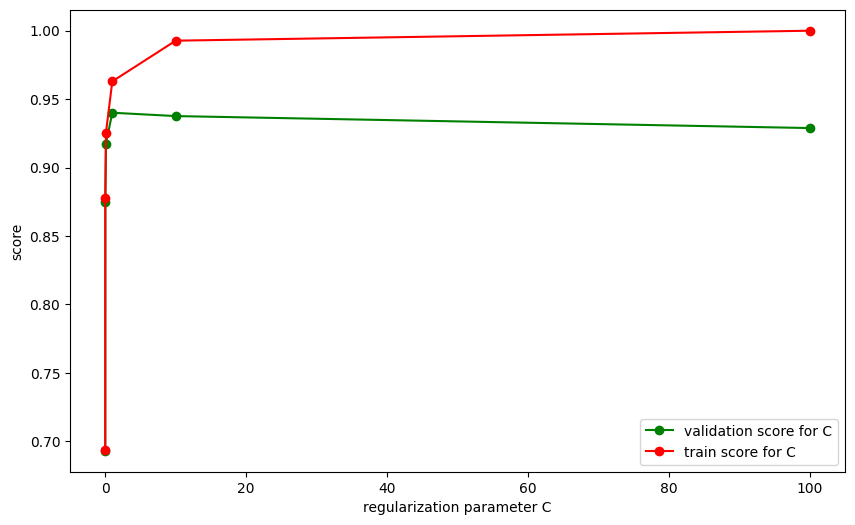

In [76]:
train_scores, valid_scores = validation_curve(clf_svm_best, X_test_s, y_test, param_name="C", param_range=[0.001, 0.01, 0.1, 1, 10, 100], cv=3)
plt.figure(figsize=(10,6))
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for C')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for C')
plt.legend()
plt.xlabel('regularization parameter C')
plt.ylabel('score')
plt.show()

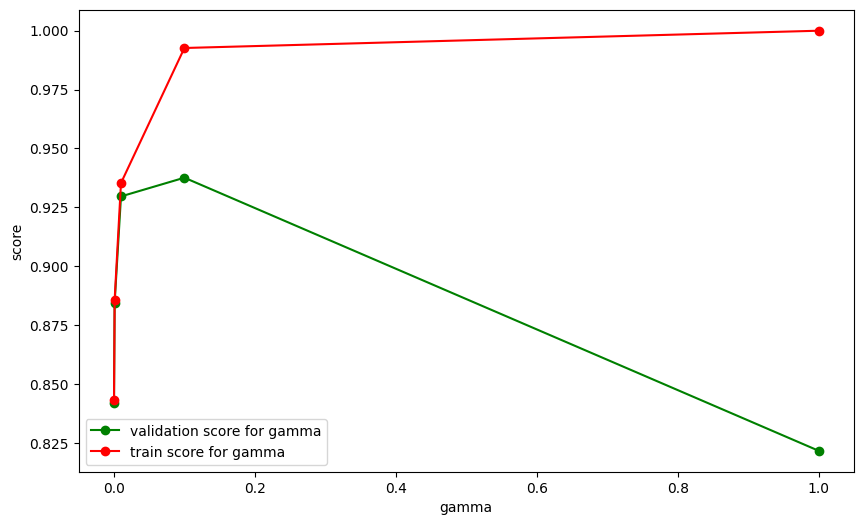

In [77]:
train_scores, valid_scores = validation_curve(clf_svm_best, X_test_s, y_test, param_name="gamma", param_range=[0.0001, 0.001, 0.01, 0.1, 1], cv=3)
plt.figure(figsize=(10,6))
plt.plot([0.0001, 0.001, 0.01, 0.1, 1], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for gamma')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for gamma')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('score')
plt.show()

In [78]:
print('Run Time for Training:', Time(clf_svm_best, X_train_s, y_train))
print('Run Time for Testing:', Time(clf_svm_best, X_test_s, y_test)) 

Run Time for Training: 194.60181975364685
Run Time for Testing: 30.827730178833008


### KNN

In [79]:
clf_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', n_jobs=-1)
clf_knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_jobs=-1)

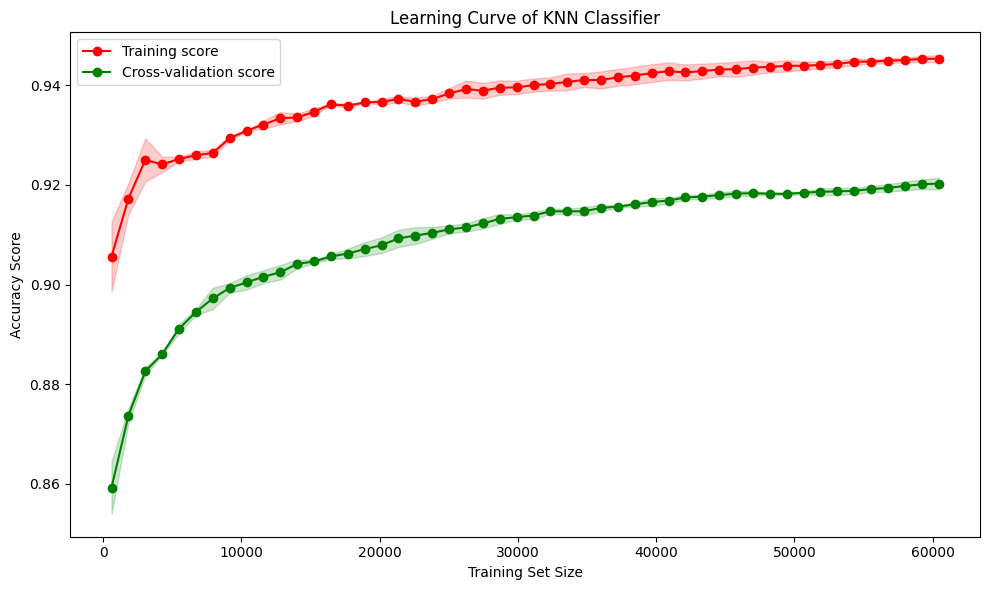

In [80]:
train_sizes, train_scores, test_scores = learning_curve(clf_knn, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of KNN Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80],
                'p': [1, 2]
             }

grid_search = GridSearchCV(clf_knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [82]:
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [83]:
print(grid_search.best_params_)
clf_knn_best = grid_search.best_estimator_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


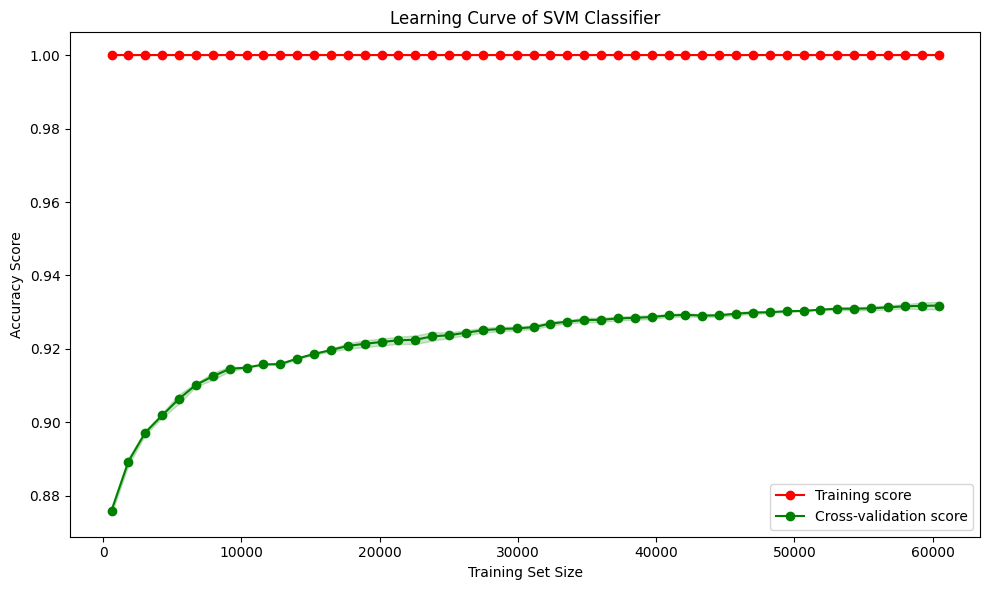

In [84]:
train_sizes, train_scores, test_scores = learning_curve(clf_knn_best, X_train_s, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve of SVM Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.tight_layout()
plt.show()

In [85]:
y_pred = clf_knn_best.predict(X_test_s)
prediction  = [1 if y>=0.5 else 0 for y in y_pred]
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, prediction)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Accuracy score: 0.9335
Confusion Matrix:
[[16540  1042]
 [ 1542 19723]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     17582
           1       0.95      0.93      0.94     21265

    accuracy                           0.93     38847
   macro avg       0.93      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



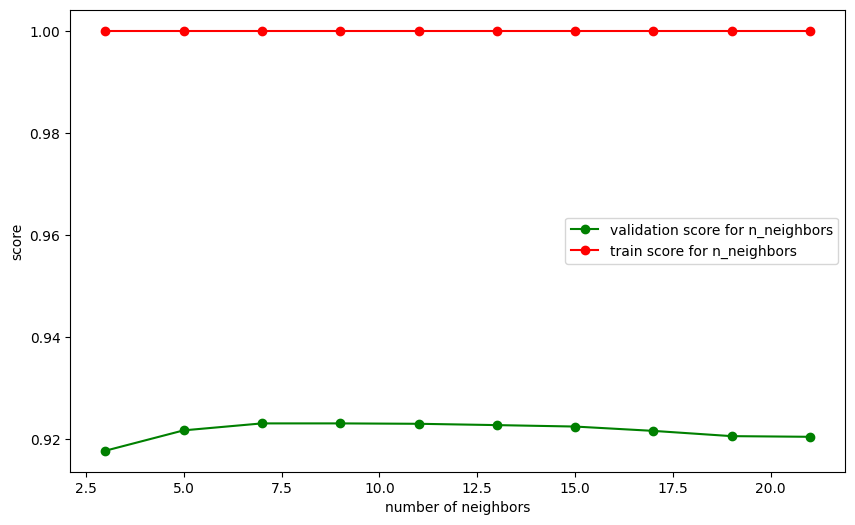

In [86]:
train_scores, valid_scores = validation_curve(clf_knn_best, X_test_s, y_test, param_name="n_neighbors", param_range=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21], cv=3)
plt.figure(figsize=(10,6))
plt.plot([3, 5, 7, 9, 11, 13, 15, 17, 19, 21], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for n_neighbors')
plt.plot([3, 5, 7, 9, 11, 13, 15, 17, 19, 21], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for n_neighbors')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.show()

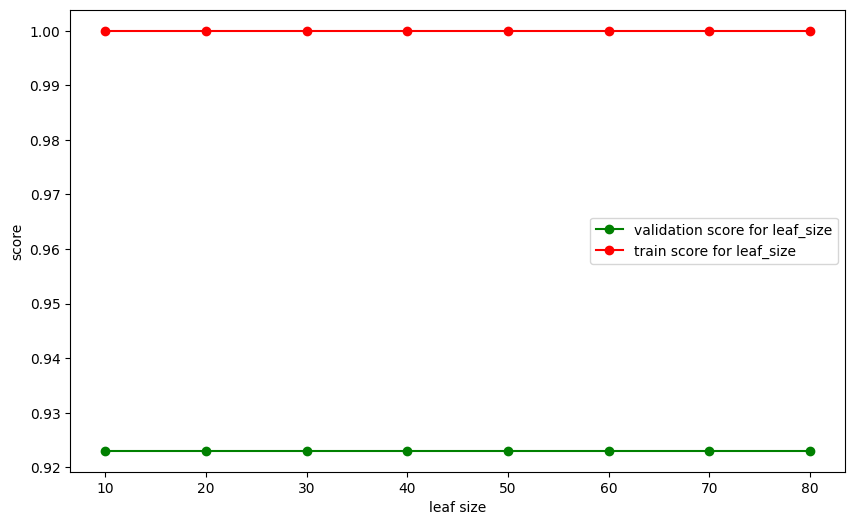

In [87]:
train_scores, valid_scores = validation_curve(clf_knn_best, X_test_s, y_test, param_name="leaf_size", param_range=[10, 20, 30, 40, 50, 60, 70, 80], cv=3)
plt.figure(figsize=(10,6))
plt.plot([10, 20, 30, 40, 50, 60, 70, 80], np.mean(valid_scores, axis=1), 'o-', color="g", label='validation score for leaf_size')
plt.plot([10, 20, 30, 40, 50, 60, 70, 80], np.mean(train_scores, axis=1), 'o-', color="r", label='train score for leaf_size')
plt.legend()
plt.xlabel('leaf size')
plt.ylabel('score')
plt.show()

In [88]:
print('Run Time for Training:', Time(clf_knn_best, X_train_s, y_train))
print('Run Time for Testing:', Time(clf_knn_best, X_test_s, y_test)) 

Run Time for Training: 0.004000663757324219
Run Time for Testing: 0.0014998912811279297
